In [ ]:
! pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 30.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     

In [ ]:
! pip install --upgrade pandas==1.4.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 49.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 1.4.4 which is incompatible.


In [ ]:
import nltk


##Downloading nltk packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import pandas as pd
import pandas as pd
from bertopic import BERTopic
import os
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# path = os.getcwd()+'/Data/data.pkl'
path = os.getcwd()+'/Data/data.pkl'
with open(path, 'rb') as f:
        df = pd.read_pickle(f)
df.head()

file_name  \
0     /content/AllwynResume/Priyanka Bowers.docx   
1    /content/AllwynResume/Tutankamon Perez.docx   
2    /content/AllwynResume/Rashid Jampatita.docx   
3  /content/AllwynResume/Vicktorya Beckmann.docx   
4       /content/AllwynResume/Sussy Partton.docx   

                                              Resume  \
0  Priyanka Bowers      Professional Summary:   1...   
1  Tutankamon Perez       _______________________...   
2  Rashid Jampatita     Senior Mobile Engineer   ...   
3  Viktoriya Beckmann     Professional Summary   ...   
4  Sussy Partton  Java FullStack Developer    Pro...   

                                      cleaned_resume  \
0  [priyanka professional, professional summary, ...   
1                                                 []   
2  [senior mobile, mobile engineer, engineer summ...   
3  [viktoriya beckmann, beckmann professional, pr...   
4  [developer professional, professional summary,...   

                                        cleaned_sent  
0  priyanka professional summary years experience...  
1                                                     
2  senior mobile engineer summary years experienc...  
3  viktoriya beckmann professional summary skille...  
4  developer professional summary developer years...

In [ ]:
df.head()

Category                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details   May 2013 to May 2017 B.E  ...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills   R   Python   SAP HANA   Tableau   SAP...   
4  Data Science  Education Details    MCA   YMCAUST,  Faridabad...   

                                      cleaned_resume  \
0  [skills programming, programming languages, la...   
1  [education details, details b.e, b.e uitrgpv, ...   
2  [areas interest, interest deep, deep learning,...   
3                                                 []   
4  [education details, details mca, mca ymcaust, ...   

                                        cleaned_sent file_name  
0  skills programming languages python pandas num...       NaN  
1  education details b.e uitrgpv data scientist d...       NaN  
2  areas interest deep learning control system de...       NaN  
3                                                          NaN  
4  education details mca ymcaust faridabad haryan...       NaN

In [ ]:
df['Category'].nunique()

25

In [ ]:
##Getting rid of empty rows
df = df[df['cleaned_sent']!= '']

In [ ]:

stop_words = list(stop_words)

In [ ]:
##Create seed list
d = df['cleaned_sent'].to_list()



# seed_topic_list = [['c++','python','pandas','mssql server','sql','html','java','css','.net','numpy','pandas','scikit-learn','etl',
#                     'hadoop','hive','bootstrap','jquery','php','html','talend'],
#                    ['pune','maharashtra','alahabad','india','us'],
#                    stop_words+['size','labs'],
#                    ['months','year','day','january','dec','june','monday'],
#                    ['salary','exprience','experience']]


seed_topic_list = [['c++','python','pandas','mssql server','sql','html','java','css','.net','numpy','pandas','scikit-learn','etl','hadoop','hive','bootstrap','jquery','php','html','talend'],
                    stop_words+['size','labs','months','year','day','january','dec','june','monday','salary','exprience','experience']]       
                   

In [ ]:
##Define BERTopic model with seed_list and tf-idf to get rid of frequent words
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.representation import MaximalMarginalRelevance
from umap import UMAP
from sklearn.decomposition import PCA

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
representation_model = MaximalMarginalRelevance(diversity=0.5)


topic_model = BERTopic(ctfidf_model=ctfidf_model,\
                       seed_topic_list=seed_topic_list, n_gram_range=(1,4), top_n_words=30,nr_topics=6,verbose=True, calculate_probabilities=True)



In [ ]:

##Fitting the model
topics, probs = topic_model.fit_transform(d)

Batches:   0%|          | 0/26 [00:00<?, ?it/s]

2023-05-07 23:07:17,489 - BERTopic - Transformed documents to Embeddings


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2023-05-07 23:07:32,866 - BERTopic - Reduced dimensionality
2023-05-07 23:07:32,979 - BERTopic - Clustered reduced embeddings
2023-05-07 23:07:43,766 - BERTopic - Reduced number of topics from 32 to 6


In [ ]:
# topics

In [ ]:
topic_terms = topic_model.get_topics()
topic_s = []

for topic in topic_terms:
  topic_s.append(topic)
  # for word in topic_terms[topic]:
  #   print(word[0])
    
print(topic_s)

[-1, 0, 1, 2, 3, 4]


In [ ]:
##Computing coherence score for topic model


import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

# Preprocess documents
cleaned_docs = topic_model._preprocess_text(d)

# Extract vectorizer and tokenizer from BERTopic
vectorizer = topic_model.vectorizer_model
tokenizer = vectorizer.build_tokenizer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [tokenizer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence = coherence_model.get_coherence()

In [ ]:
coherence

-1.6026772979507533

In [ ]:
from bertopic import BERTopic
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

# topic_model = BERTopic(verbose=True, n_gram_range=(1, 3))
# topics, _ = topic_model.fit_transform(d)

# Preprocess Documents
documents = pd.DataFrame({"Document": d,
                          "ID": range(len(d)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence = coherence_model.get_coherence()

In [ ]:
coherence

-0.487187732117815

In [ ]:
len(set(topics))-1

5

In [ ]:

##computing coherence score per topic using u_mass
coherence_scores = []
for topic in range(len(set(topics))-1):
    topic_words = [words for words, _ in topic_model.get_topic(topic)]
    coherence_model = CoherenceModel(topics=[topic_words], 
                                     texts=tokens, 
                                     corpus=corpus,
                                     dictionary=dictionary, 
                                     coherence='u_mass')
    coherence_scores.append(coherence_model.get_coherence())

# Print coherence score for each topic
for topic, score in enumerate(coherence_scores):
    print(f"Topic {topic}: {score}")

Topic 0: -0.9617319739245647
Topic 1: -1.4656158167876487
Topic 2: -0.7200081155522711
Topic 3: -3.4037139575990687
Topic 4: -1.4623166258902136


In [ ]:
##computing coherence score per topic using c_v
coherence_scores = []
for topic in range(len(set(topics))-1):
    topic_words = [words for words, _ in topic_model.get_topic(topic)]
    coherence_model = CoherenceModel(topics=[topic_words], 
                                     texts=tokens, 
                                     corpus=corpus,
                                     dictionary=dictionary, 
                                     coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Print coherence score for each topic
for topic, score in enumerate(coherence_scores):
    print(f"Topic {topic}: {score}")

Topic 0: 0.34682268171914565
Topic 1: 0.586680633857999
Topic 2: 0.7764109020499028
Topic 3: 0.6195157821749164
Topic 4: 0.9646206938135268


In [ ]:
##computing topic diversity
from gensim.models import CoherenceModel
from collections import Counter

# Extract topics and top words
# topics = lda_model.show_topics(num_topics=-1, formatted=False)
top_words = [[words for words, _ in topic_model.get_topic(topic)] 
                for topic in range(len(set(topics))-1)]

# Compute topic diversity
topic_counter = Counter()
for words in top_words:
    for word in words:
        topic_counter[word] += 1
topic_diversity = len(topic_counter) / (30 * len(topic_s))
print('Topic diversity:', topic_diversity)


Topic diversity: 0.6944444444444444


In [ ]:
##Topic words 

for topic in range(len(set(topics))-1):
  print(topic)
  for words, _ in topic_model.get_topic(topic):
   print(words,_)

0
exprience 0.24094792820425842
company 0.23606837325246388
project 0.22992671378226526
months 0.22748159580198365
description 0.21942028517472292
details 0.20924600202898042
management 0.1995430599147628
team 0.19733399784973976
january 0.19293862735706646
test 0.19257275059643658
testing 0.1879280243876315
development 0.1872113445909863
data 0.1854908690949299
business 0.1822237038557283
exprience months 0.17956802698176877
engineering 0.17942012072991773
client 0.17796083524006037
experience 0.17434136791308075
system 0.17296300708457754
ltd 0.17196479271079862
etl 0.17140306600874297
maharashtra 0.16824404252723835
sql 0.16620675654052952
application 0.1651567301824121
requirements 0.16466415694416217
year 0.1637727752219657
services 0.16366414364479367
python 0.16288042831205513
process 0.16283061272340477
sales 0.16274835994389192
1
months 0.564208022316357
exprience 0.5392818149527705
year 0.43943896816217076
exprience months 0.38436494676277366
exprience year 0.3570226324134912

In [ ]:
df.iloc[100].Category

'Web Designing'

In [ ]:
topic_model.visualize_distribution(probs[100])

In [ ]:
# Calculate the topic distributions on a token-level
topic_distr, topic_token_distr = topic_model.approximate_distribution(d, calculate_tokens=True)

# Visualize the token-level distributions
df1 = topic_model.visualize_approximate_distribution(d[100], topic_token_distr[100])
df1

100%|██████████| 1/1 [00:08<00:00,  8.34s/it]


In [ ]:
topic_term_matrix = topic_model.c_tf_idf_
words = topic_model.vectorizer_model.get_feature_names_out()

In [ ]:
len(words)

103623

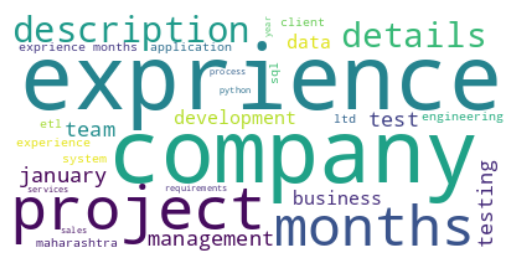

In [ ]:
##visualizing as wordcloud per topic
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white")
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=0)


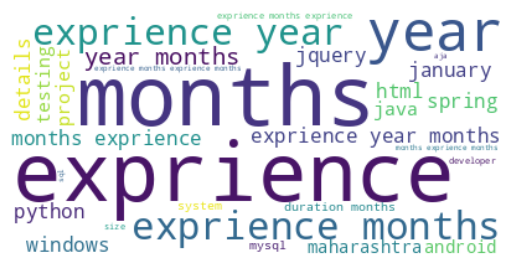

In [ ]:
##visualizing as wordcloud per topic
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=1)

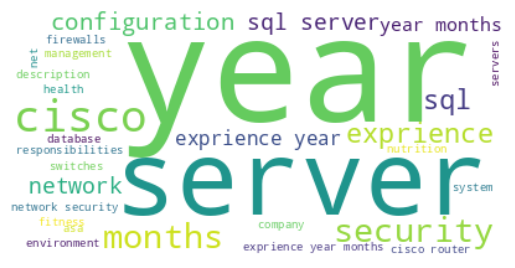

In [ ]:
##visualizing as wordcloud per topic
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=-1)

In [ ]:

##Gives count of terms per topic
topic_model.get_topic_info()

Topic  Count                                      Name
0     -1     55             -1_year_server_cisco_security
1      0    559        0_exprience_company_project_months
2      1    101  1_months_exprience_year_exprience months
3      2     42                  2_hadoop_hive_data_sqoop
4      3     39      3_salary_allahabad_exprience_january
5      4     18               4_bootstrap_php_jquery_size

In [ ]:
# Get all terms in each topic

topic_terms = topic_model.get_topics()
topic_terms



{-1: [('year', 0.3304544861997645),
  ('server', 0.32889108429896113),
  ('cisco', 0.32776724099680166),
  ('security', 0.326372287219134),
  ('months', 0.325500146557437),
  ('exprience', 0.32184613116382427),
  ('sql', 0.3086913345077931),
  ('configuration', 0.2983335673003412),
  ('network', 0.27665217935195974),
  ('sql server', 0.27648911450720653),
  ('exprience year', 0.27585779916499586),
  ('year months', 0.27536445743774013),
  ('exprience year months', 0.27477741546846957),
  ('management', 0.26615664116621124),
  ('description', 0.25735307741693025),
  ('database', 0.25173546189377694),
  ('company', 0.2375982103941315),
  ('network security', 0.2350086809272697),
  ('health', 0.2340556008969577),
  ('fitness', 0.23224316573065276),
  ('switches', 0.23200181087447963),
  ('nutrition', 0.22988833671933512),
  ('net', 0.22435347779532888),
  ('responsibilities', 0.22356636528117807),
  ('asa', 0.2225642538393749),
  ('firewalls', 0.22010132533210816),
  ('environment', 0.216

In [ ]:

topic_model.visualize_hierarchy()

In [ ]:
##Cluster distance between each topic
cluster_diagram = topic_model.visualize_topics()

In [ ]:
cluster_diagram

In [ ]:

##Get terms that are most similar to a particular skill Eg:sql['sql','python','css','bootstrap','html'
similar_topics, similarity = topic_model.find_topics(['sql','css'])
similar_topics, similarity

([4, -1, 2, 3, 1],
 [0.4943896350255398,
  0.29136840305904677,
  0.25701712913307767,
  0.2547999076016737,
  0.2246956906002145])

In [ ]:
##Shows terms that in topic -1 which represents non-skills

topic_model.get_topic(similar_topics[2])

[('hadoop', 0.6539503601375013),
 ('hive', 0.5915317061663162),
 ('data', 0.49659739356616445),
 ('sqoop', 0.39924249533595185),
 ('hdfs', 0.3939576862035009),
 ('cluster', 0.3424684137144724),
 ('spark', 0.3420231438946347),
 ('pig', 0.33103427846638134),
 ('mapreduce', 0.3233532770558805),
 ('hbase', 0.29584935960702646),
 ('hive queries', 0.27853939437897135),
 ('scala', 0.27794730810034685),
 ('map', 0.2691419350861365),
 ('ecosystem', 0.2678261446789725),
 ('tables', 0.26739098199716954),
 ('queries', 0.2640196392959633),
 ('flume', 0.2562827843828852),
 ('hive tables', 0.2562827843828852),
 ('hadoop developer', 0.2562827843828852),
 ('exprience', 0.24843802409847474),
 ('hive sqoop', 0.2437328996462894),
 ('oozie', 0.2437328996462894),
 ('hadoop ecosystem', 0.2437328996462894),
 ('data hive', 0.2437328996462894),
 ('sql', 0.23854688081212447),
 ('months', 0.2378233708601391),
 ('description', 0.2373311243490236),
 ('impala', 0.22993058635219038),
 ('hadoop hdfs', 0.22993058635219

In [ ]:
####Shows terms that in topic -1 which represents skills
topic_model.get_topic(similar_topics[0])

[('sql', 0.4790759168329392),
 ('server', 0.39938859940996135),
 ('sql server', 0.3940564826169465),
 ('database', 0.3263359784095085),
 ('mirroring', 0.3222455270705321),
 ('ms sql', 0.31561311988372037),
 ('ms sql server', 0.31561311988372037),
 ('issues', 0.31516955835421195),
 ('log shipping', 0.3091276149664561),
 ('test', 0.30264271570879053),
 ('description', 0.29770239697709144),
 ('views', 0.28600260705369634),
 ('database mirroring', 0.28390817694885656),
 ('shipping', 0.27921822187662954),
 ('log', 0.27772869352687146),
 ('ms', 0.27726784054015746),
 ('company', 0.2759083158166942),
 ('windows server', 0.2696099512293186),
 ('performance', 0.26723697706324756),
 ('azure', 0.26478696219766296),
 ('replication', 0.2591638420087795),
 ('exprience', 0.25607501866010024),
 ('environment sql server windows', 0.24894254817213968),
 ('environment sql server', 0.24894254817213968),
 ('clustering', 0.24894254817213968),
 ('server windows server', 0.24894254817213968),
 ('sql server wi

In [ ]:
## First and last element are least similar to the search term:
##Those are not skills.
least_sim_min = similar_topics[0]
least_sim_max = similar_topics[-1]

print(topic_model.get_topic(similar_topics[least_sim_min ]))

print(topic_model.get_topic(similar_topics[least_sim_max]))

[('months', 0.564208022316357), ('exprience', 0.5392818149527705), ('year', 0.43943896816217076), ('exprience months', 0.38436494676277366), ('exprience year', 0.3570226324134912), ('year months', 0.3550948130868461), ('exprience year months', 0.3460534433924588), ('january', 0.32797603039843815), ('months exprience', 0.3231375503793708), ('details', 0.32203128288841243), ('spring', 0.3123789757165359), ('python', 0.3116315339521564), ('html', 0.311389074172498), ('windows', 0.31067091882324877), ('jquery', 0.2996301076233667), ('java', 0.2747905410706658), ('testing', 0.27468562420115533), ('project', 0.27324821576513014), ('maharashtra', 0.27065983344826866), ('android', 0.2685383189363815), ('duration months', 0.2663382470898618), ('mysql', 0.2651792095184708), ('system', 0.2639573460128064), ('exprience months exprience', 0.2635262050412275), ('size', 0.262888803335086), ('developer', 0.2578920693554984), ('exprience months exprience months', 0.2576330115425387), ('months exprience

In [ ]:
##Getting skills from the relevant topics and discarding the above topic ids
sim_skills = similar_topics[1:-1]

sim_skills 

[-1, 2, 3]

In [ ]:
##Getting skills based on probability>0.01 after analyzing topics 
skills = []

for i in sim_skills:
  temp = topic_model.get_topic(similar_topics[i])
  for i in temp:
    if round(i[1],3)>0.01:
      skills.append(i[0])

In [ ]:
skills

['months',
 'exprience',
 'year',
 'exprience months',
 'exprience year',
 'year months',
 'exprience year months',
 'january',
 'months exprience',
 'details',
 'spring',
 'python',
 'html',
 'windows',
 'jquery',
 'java',
 'testing',
 'project',
 'maharashtra',
 'android',
 'duration months',
 'mysql',
 'system',
 'exprience months exprience',
 'size',
 'developer',
 'exprience months exprience months',
 'months exprience months',
 'aja',
 'sql',
 'hadoop',
 'hive',
 'data',
 'sqoop',
 'hdfs',
 'cluster',
 'spark',
 'pig',
 'mapreduce',
 'hbase',
 'hive queries',
 'scala',
 'map',
 'ecosystem',
 'tables',
 'queries',
 'flume',
 'hive tables',
 'hadoop developer',
 'exprience',
 'hive sqoop',
 'oozie',
 'hadoop ecosystem',
 'data hive',
 'sql',
 'months',
 'description',
 'impala',
 'hadoop hdfs',
 'data rdbms',
 'salary',
 'allahabad',
 'exprience',
 'january',
 'pcb',
 'details',
 'months',
 'year',
 'matri technologies',
 'pcb design',
 'quality engineer',
 'exprience months pcb',


In [ ]:
##GetDocument wise topic distribution with probability

doc_topics = pd.DataFrame()
doc_topics = topic_model.get_document_info(d)

In [ ]:
doc_topics.head()

Document  Topic  \
0  skills programming languages python pandas num...      0   
1  education details b.e uitrgpv data scientist d...      1   
2  areas interest deep learning control system de...      0   
3  education details mca ymcaust faridabad haryan...      1   
4  skills c basics iot python matlab data science...      1   

                                       Name  \
0        0_exprience_company_project_months   
1  1_months_exprience_year_exprience months   
2        0_exprience_company_project_months   
3  1_months_exprience_year_exprience months   
4  1_months_exprience_year_exprience months   

                                         Top_n_words  Probability  \
0  exprience - company - project - months - descr...     1.000000   
1  months - exprience - year - exprience months -...     0.120460   
2  exprience - company - project - months - descr...     1.000000   
3  months - exprience - year - exprience months -...     0.184636   
4  months - exprience - year - exprience months -...     0.257731   

   Representative_document  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False

In [ ]:

##Deafult BERTopic with no hyperparamter tuning
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP

# Prepare embeddings
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(d, show_progress_bar=False)

# Train BERTopic
#topic_model = BERTopic(seed_topic_list=seed_topic_list,top_n_words=20, n_gram_range=(1,4),nr_topics=5).fit(d, embeddings)

# Run the visualization with the original embeddings
topic_model.visualize_documents(d, embeddings=embeddings)

# Reduce dimensionality of embeddings, this step is optional but much faster to perform iteratively:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
topic_model.visualize_documents(d, reduced_embeddings=reduced_embeddings)


In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
###Number of terms representing topics declines after 30
topic_model.visualize_term_rank()

In [ ]:

##Writing skills extracted from topics to dataframe
df_skills = pd.DataFrame(skills, columns=['skill'])

##writing skills to csv
df_skills.to_csv(os.getcwd()+'/Data/guided_skills.csv')

In [ ]:

from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP

# Prepare embeddings

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(d, show_progress_bar=False)

# Train BERTopic
model = BERTopic(seed_topic_list=seed_topic_list).fit(d, embeddings)

# Run the visualization with the original embeddings
model.visualize_documents(d, embeddings=embeddings)

# Reduce dimensionality of embeddings, this step is optional but much faster to perform iteratively:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
model.visualize_documents(d, reduced_embeddings=reduced_embeddings)

In [ ]:
import plotly.io as pio
figure = model.visualize_documents(d, reduced_embeddings=reduced_embeddings)

pio.write_html(figure, file='document_topic.html', auto_open=True)


In [ ]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.4 MB/s eta 0:00:00
